<a href="https://colab.research.google.com/github/630kiran/630kiran/blob/main/Task2_Bank_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
#Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/churn.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Clean the Dataset
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [24]:
#Remove unneeded columns:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])


In [25]:
#Basic EDA
#Churn Rate

churn_rate = df['Exited'].mean()
print("Churn Rate:", churn_rate)


Churn Rate: 0.2037


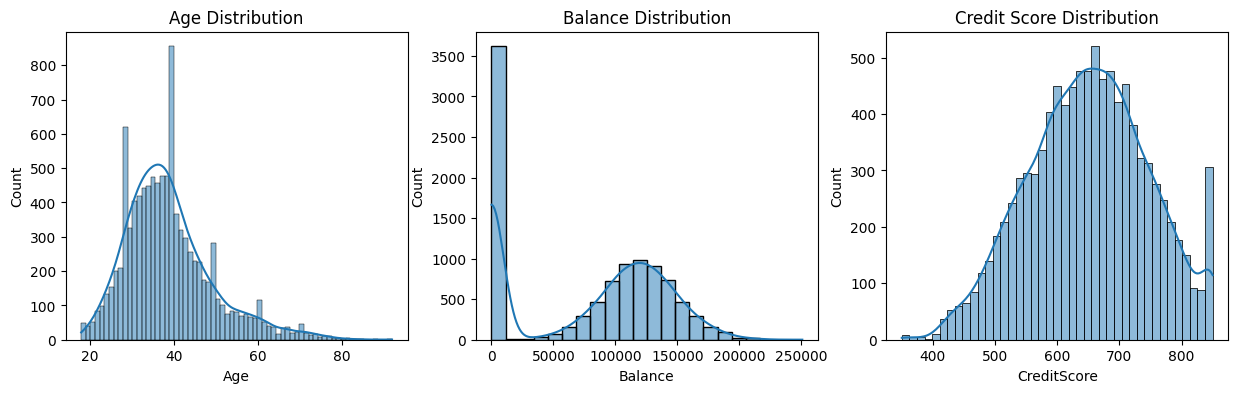

In [27]:
#Distribution of Age, Balance, Credit Score
fig, ax = plt.subplots(1,3, figsize=(15,4))

sns.histplot(df['Age'], kde=True, ax=ax[0])
ax[0].set_title("Age Distribution")

sns.histplot(df['Balance'], kde=True, ax=ax[1])
ax[1].set_title("Balance Distribution")

sns.histplot(df['CreditScore'], kde=True, ax=ax[2])
ax[2].set_title("Credit Score Distribution")

plt.show()


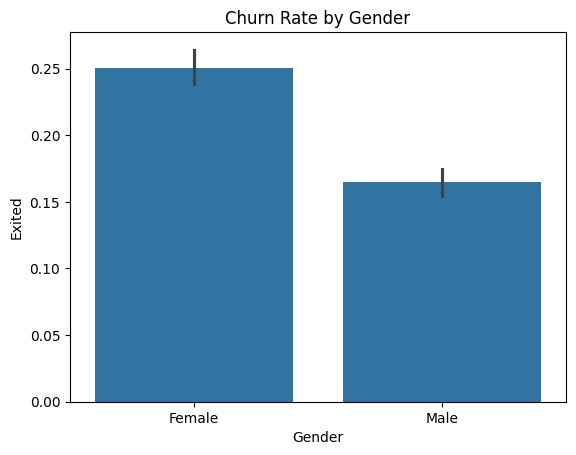

In [28]:
#Gender vs Churn
sns.barplot(data=df, x='Gender', y='Exited')
plt.title("Churn Rate by Gender")
plt.show()


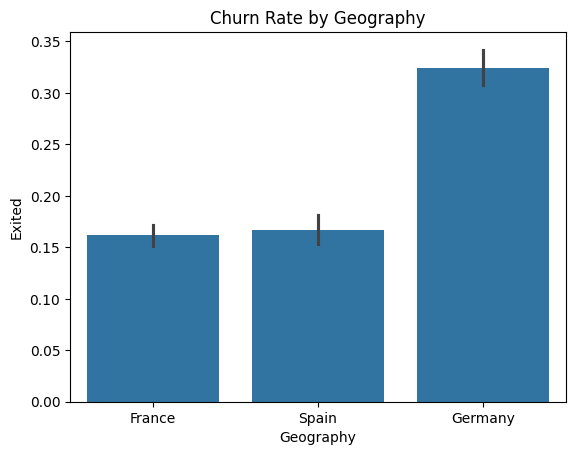

In [29]:
#Geography vs Churn
sns.barplot(data=df, x='Geography', y='Exited')
plt.title("Churn Rate by Geography")
plt.show()


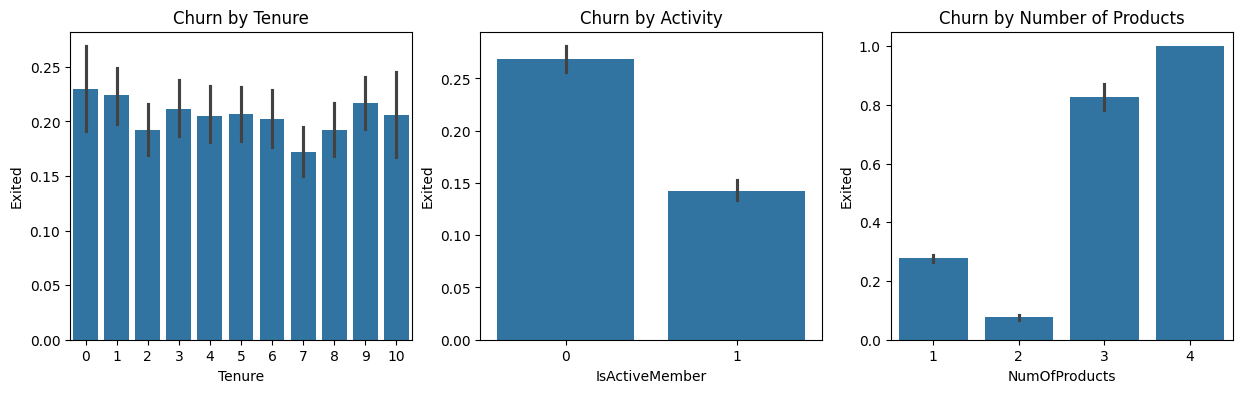

In [30]:
#Churn vs Tenure, Activity, Products
fig, ax = plt.subplots(1, 3, figsize=(15,4))

sns.barplot(data=df, x='Tenure', y='Exited', ax=ax[0])
ax[0].set_title("Churn by Tenure")

sns.barplot(data=df, x='IsActiveMember', y='Exited', ax=ax[1])
ax[1].set_title("Churn by Activity")

sns.barplot(data=df, x='NumOfProducts', y='Exited', ax=ax[2])
ax[2].set_title("Churn by Number of Products")

plt.show()


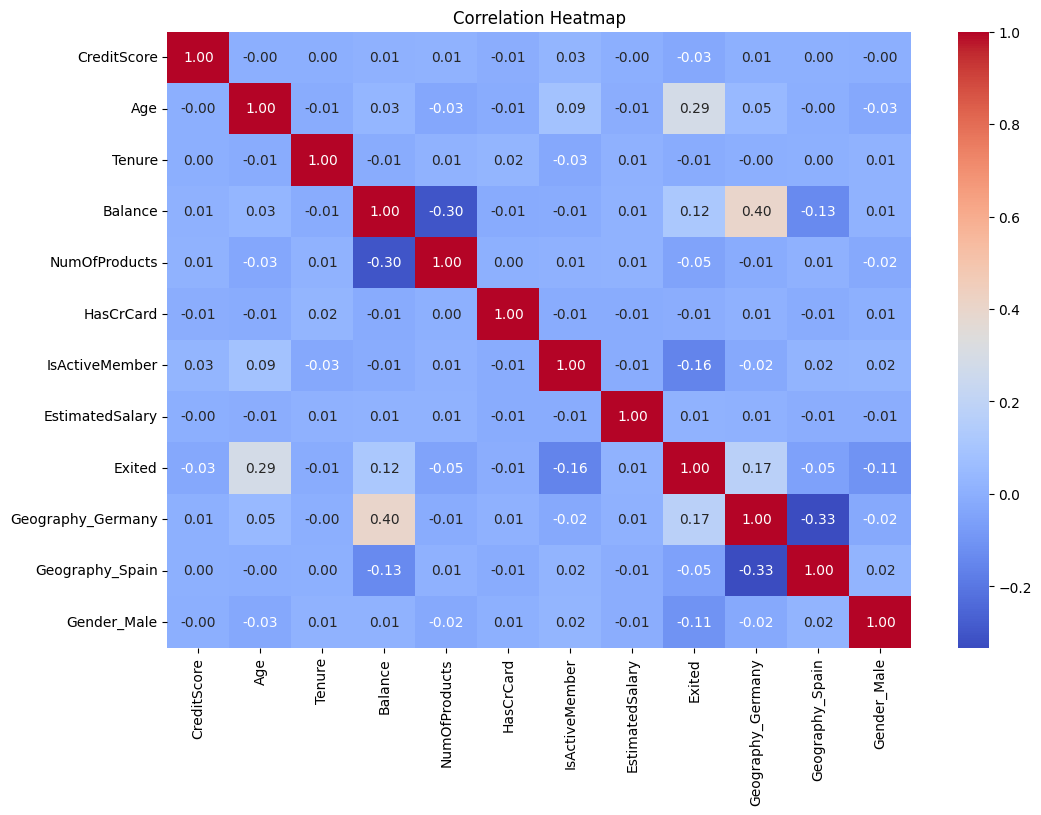

In [33]:
#Correlation Analysis
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

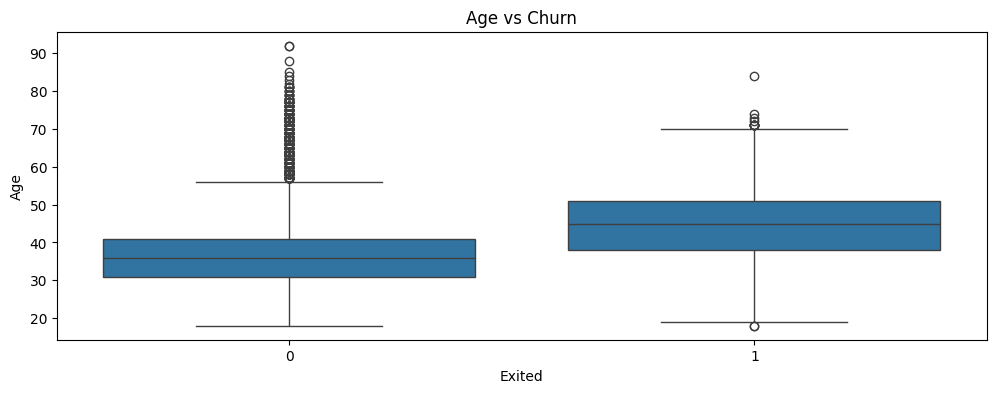

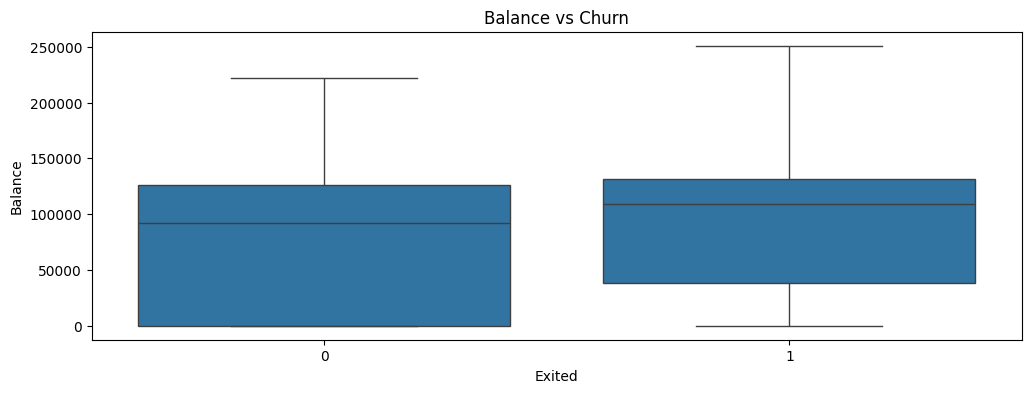

In [34]:
#Boxplots for Churn Understanding
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title("Age vs Churn")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title("Balance vs Churn")
plt.show()


* Key Insights from Bank Customer Churn Analysis

  1️⃣ High Churn Groups

* Older customers (50+) show higher churn probability.

* Customers with high balance but low activity are more likely to exit.

* Customers with only 1 product churn significantly more.

* Inactive members (IsActiveMember = 0) have a much higher churn rate.

2️⃣ Geography Impact

Germany shows the highest churn rate compared to France and Spain.

3️⃣ Credit Score

Lower credit scores (< 600) show higher churn.

4️⃣ Tenure

Surprisingly, very low-tenure (0–1 years) customers churn more — suggesting onboarding issues.

5️⃣ Correlations

Strongest correlation with churn:

IsActiveMember (-0.15) → inactive = more churn

NumOfProducts (-0.05) → fewer products = more churn

Age (0.29) → older customers churn more

(Balance, salary, credit score have weak linear correlation but strong visual patterns.)